In [1]:
# Dicision Tree Classification
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
# Load our data
data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [36]:
# Load our in target and feature values
feature_cols = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
X = data[feature_cols]
y = data.Outcome

'Glucose'

In [4]:
# Split dataset into training set and test set
X_train , X_test , y_train , y_test = train_test_split( X , y , random_state = 1 , test_size = 0.2 )

In [18]:
# Train our model 
dt = DecisionTreeClassifier()
dt.fit(X_train , y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [84]:
# Predicting the response on test data
y_predict = dt.predict(X_test)

# Checking for accuracy 
metrics.accuracy_score( y_test , y_predict)


Help on package sklearn.metrics in sklearn:

NAME
    sklearn.metrics

DESCRIPTION
    The :mod:`sklearn.metrics` module includes score functions, performance metrics
    and pairwise metrics and distance computations.

PACKAGE CONTENTS
    base
    classification
    cluster (package)
    pairwise
    pairwise_fast
    ranking
    regression
    scorer
    setup
    tests (package)

FUNCTIONS
    accuracy_score(y_true, y_pred, normalize=True, sample_weight=None)
        Accuracy classification score.
        
        In multilabel classification, this function computes subset accuracy:
        the set of labels predicted for a sample must *exactly* match the
        corresponding set of labels in y_true.
        
        Read more in the :ref:`User Guide <accuracy_score>`.
        
        Parameters
        ----------
        y_true : 1d array-like, or label indicator array / sparse matrix
            Ground truth (correct) labels.
        
        y_pred : 1d array-like, or label in

In [7]:
#import sys
#!{sys.executable} -m pip install graphviz

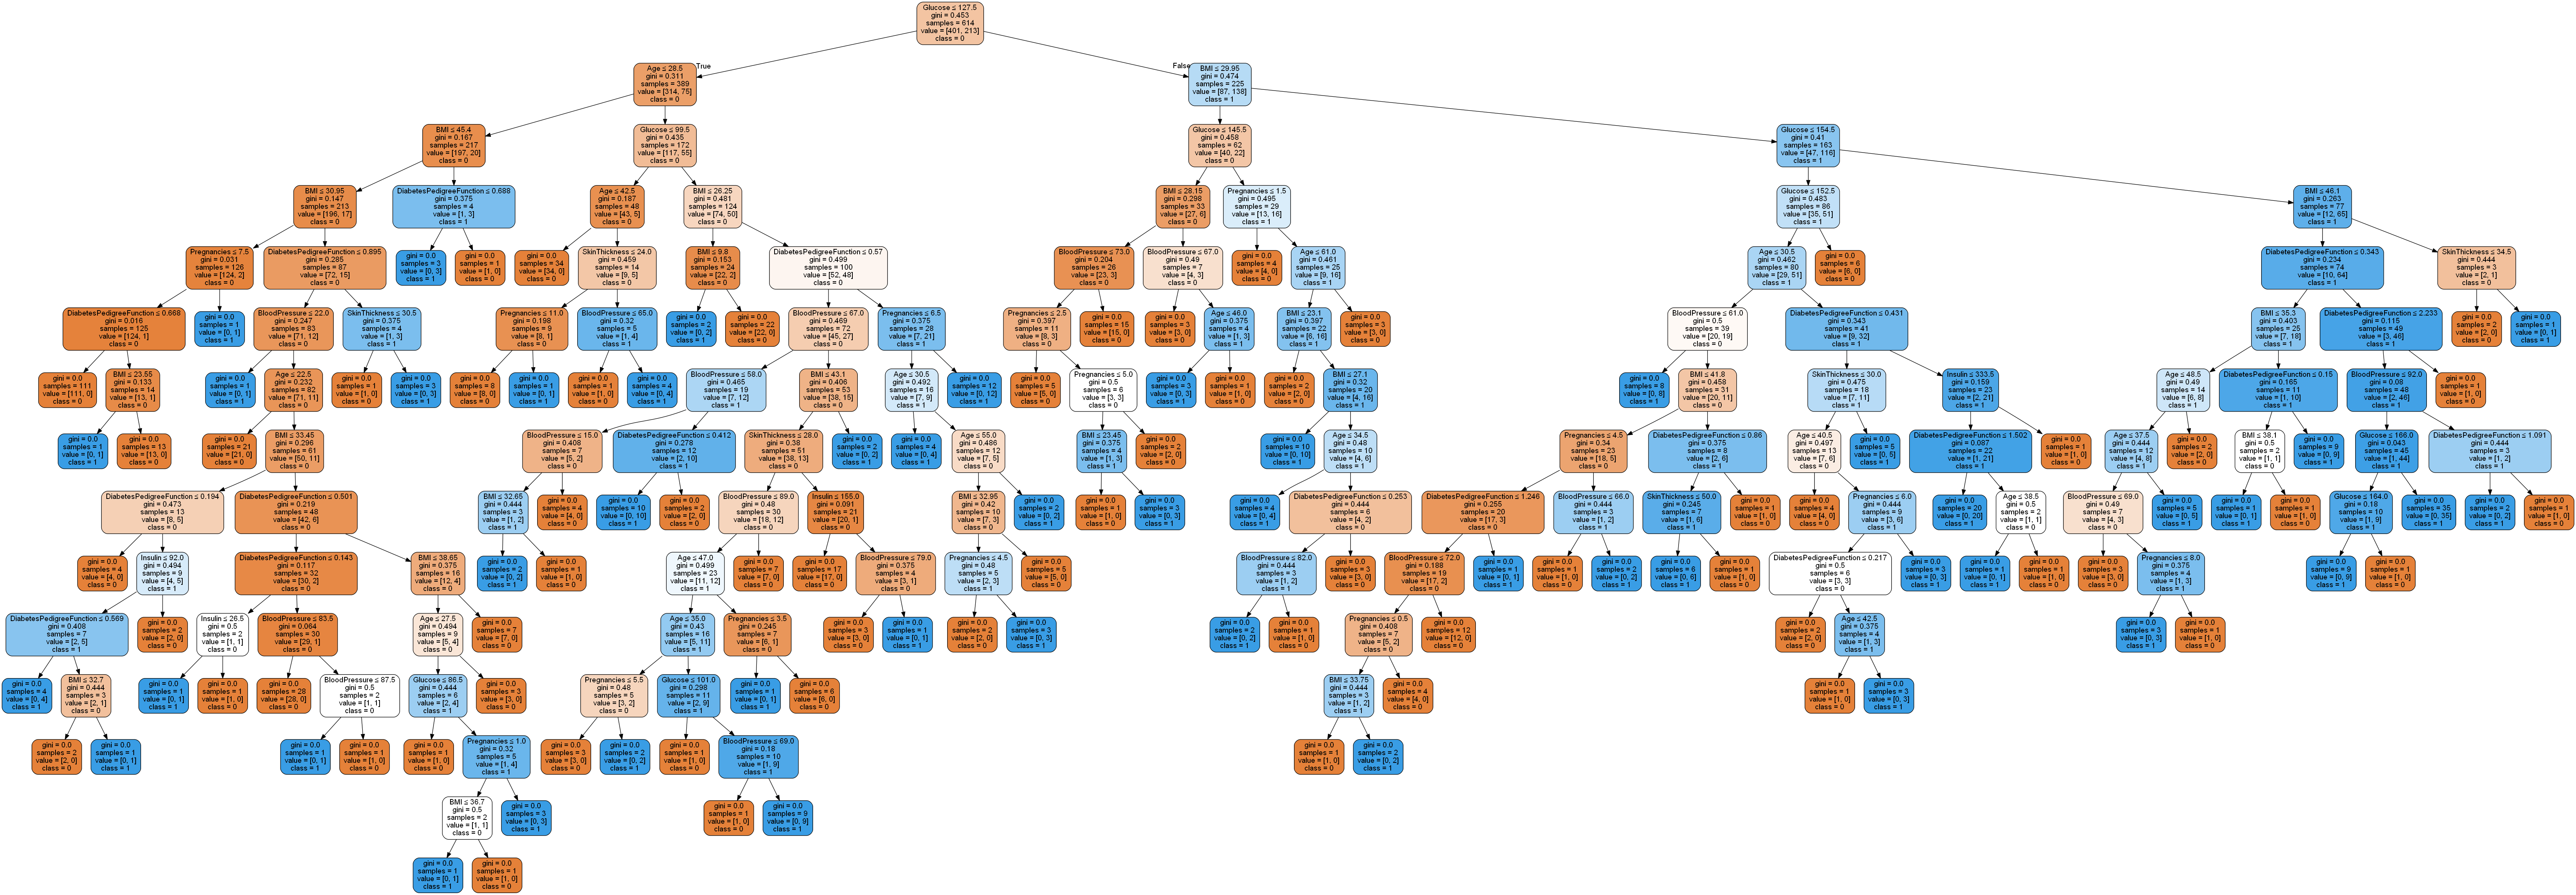

In [20]:
# Let's visualze 
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus


dot_data = StringIO()
export_graphviz(dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

In [28]:
# let's prune the tree for more accuracy
# Train our model 
# Max_depth = 2 ,3 , criterion = 'entropy'
dt = DecisionTreeClassifier( max_depth = 2 )
dt.fit(X_train , y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [29]:
# Predicting the response on test data
y_predict = dt.predict(X_test)

# Checking for accuracy 
metrics.accuracy_score( y_test , y_predict)

0.7987012987012987

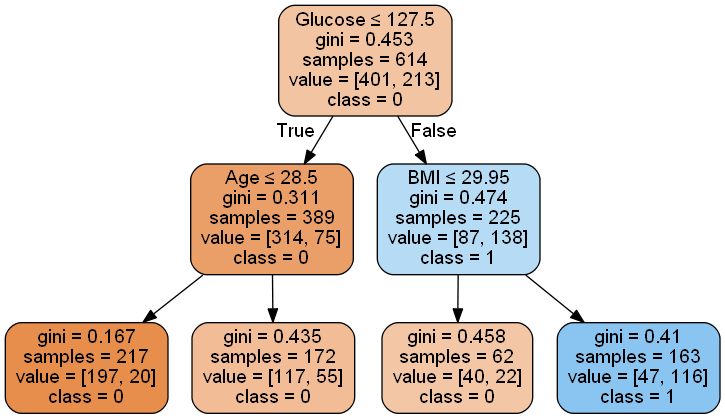

In [137]:
# Let's visualze 
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus


dot_data = StringIO()
export_graphviz(dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetess.png')
Image(graph.create_png())

In [97]:
# let's take some sample spaces

data.head()
X_sample =[[6,148,72,35,0,33.6,0.627,50]]
X_sample

[[6, 148, 72, 35, 0, 33.6, 0.627, 50]]

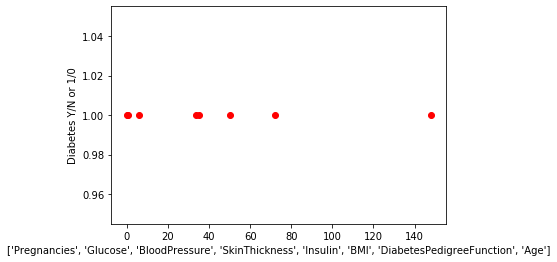

'Yes you have diabetes'

In [136]:
x_predict = dt.predict(X_sample)
ans = ''
if x_predict == 0 :
    ans += 'No you don''t have Diabetes'
else:
    ans += 'Yes you have diabetes'
plt.plot(X_sample , x_predict,'ro', label = '{0}'.format(ans))
plt.ylabel('Diabetes Y/N or 1/0')
plt.xlabel(feature_cols)
plt.show()
ans

In [ ]:
# I'm Done for today